In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Inital Parameters

In [2]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k = 0.1
gamma = 0.2
mu = 2
beta = 3
alpha_up = np.arange(0,20, 0.1)
alpha_down = alpha_up[::-1]

In [3]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).find_peaks_max()[1][1]['peak_heights'][-6:])
    return amp

In [4]:
par0 = -0.83424703, -5.20785553, -3.79697456, -7.95828013
amplitudes_up = []
amplitudes_down = []

for f in alpha_up:
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, f, beta).duffvdpsolver()
    par0 = sol[-1]
    print(par0)
    amplitudes_up.append(compute_amplitude(par0, t, keep, k, mu, gamma, f, beta))


par0 = sol[-1]
for j in alpha_down:
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    par0 = sol[-1]  
    print(par0)
    amplitudes_down.append(compute_amplitude(par0, t, keep, k, mu, gamma, j, beta))

[-1.5932389  -0.66212206  0.45240306 -0.1330469 ]
[ 1.05816806 -0.06733049  3.78633473  0.38487779]
[ 1.56604684  0.61066482 -0.46476508  0.02252641]
[-1.27627586  0.00930979 -3.55747522 -0.36490808]
[-1.53822475 -0.54330933  0.47798358  0.05430484]
[1.47879453 0.04008244 3.10909051 0.33902473]
[ 1.50818264  0.46744833 -0.49294392 -0.10242428]
[-1.66555604 -0.07997695 -2.45275025 -0.30537406]
[-1.47513501 -0.38924027  0.51027487  0.12833942]
[1.79638557 0.10457688 1.82382938 0.26452246]
[ 1.44352989  0.31577091 -0.52775604 -0.13646439]
[-1.88998157 -0.11601675 -1.26239047 -0.22154159]
[-1.41137208 -0.25152461  0.54650415  0.13509541]
[1.95187514 0.11720355 0.81365405 0.18219465]
[ 1.37636196  0.19855248 -0.56807734 -0.12978497]
[-1.99135275 -0.11300903 -0.46167261 -0.15002211]
[-1.3399214  -0.1569844   0.59188762  0.1229246 ]
[2.01203995 0.10640468 0.21132343 0.12546813]
[ 1.30189602  0.12477311 -0.61828611 -0.11597955]
[-2.01955016 -0.09942138 -0.03852915 -0.10728621]
[-1.26211849 -0.

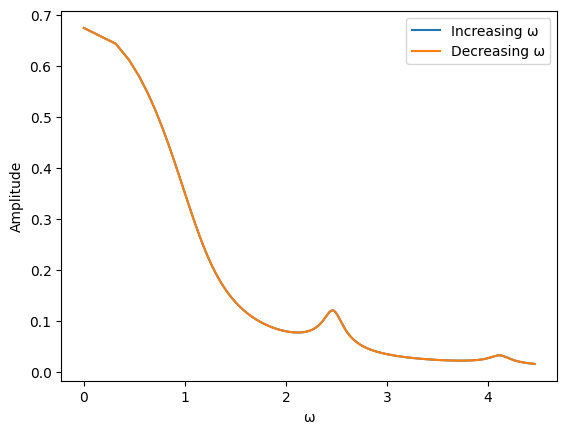

In [5]:

plt.plot(np.sqrt(alpha_up), amplitudes_up, label="Increasing ω")
plt.plot(np.sqrt(alpha_down), amplitudes_down, label="Decreasing ω")
plt.xlabel("ω")
plt.ylabel("Amplitude")
plt.legend()
plt.show()